In [33]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from time import time

In [34]:
def _calc_pi(N):
    in_circ = 0
    start = time()
    for i in range(N):
        x, y = random(), random()
        in_circ = in_circ + 1 if x**2 + y**2 < 1 else in_circ

    pi = 4 * (in_circ/N)
    return pi, time()-start

calc_pi = np.vectorize(_calc_pi)

In [17]:
N = np.logspace(1,6,6,dtype=int)

pi = calc_pi(N)

relerr_pi = np.abs(np.pi - pi)/np.pi

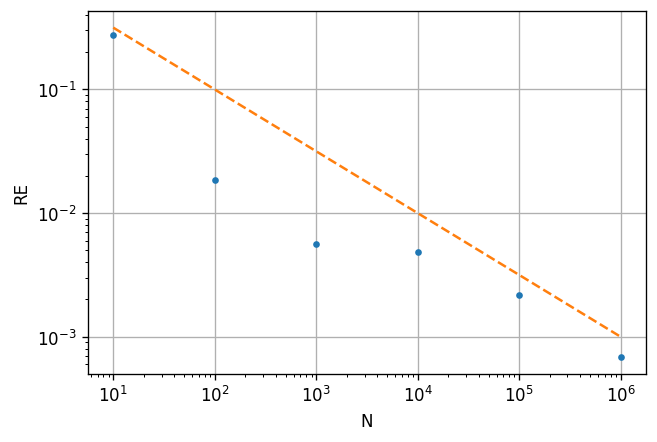

In [28]:
plt.figure(dpi=120)
plt.plot(N, relerr_pi, '.')
plt.plot(N, 1/np.sqrt(N), '--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('RE')
plt.grid()
plt.savefig('figures/pi_rel_err.png')
plt.show()

In [26]:
def _romberg_integ(f, a, b, n):
    start = time()
    R = np.zeros((n+1,n+1))

    R[0,0] = 0.5*(b-a)*(f(a)+f(b))
    for i in range(1, n+1):
        hn = 1/(2**i)*(b-a)
        R[i,0] = 0.5*R[i-1,0] + hn*np.sum(f(a + hn*np.arange(start=1, stop=2**i+1, step=2)))

    for i in range(1, n+1):
        for j in range(1, i+1):
            R[i,j] = R[i,j-1] + 1/((4**j)-1)*(R[i, j-1] - R[i-1, j-1])

    return R[n,n], time()-start

romberg_integ = np.vectorize(_romberg_integ)

In [8]:
def f(x):
    return 2*np.sqrt(1-x**2)

In [10]:
n = np.arange(0,25)
pi = romberg_integ(f,-1,1,n)
relerr_pi = np.abs(np.pi - pi)/np.pi

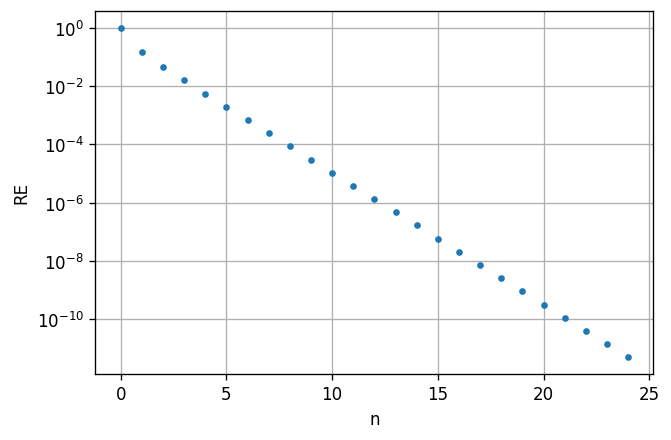

In [15]:
plt.figure(dpi=120)
plt.plot(n, relerr_pi, '.')
plt.xlabel('n')
plt.ylabel('RE')
plt.yscale('log')
plt.grid()
plt.savefig('figures/pi_integ.png')
plt.show()

In [36]:
delta = 1e-4

runs = 5
N_MC = 0
T_MC = 0
for i in range(0,runs):
    N = np.logspace(3,7,30,dtype=int)
    pi, times = calc_pi(N)
    relerr_pi = np.abs(np.pi - pi)/np.pi
    N_MC += N[np.argmax(relerr_pi < delta)]
    T_MC += times[np.argmax(relerr_pi < delta)]

N_MC /= runs
T_MC /= runs

In [35]:
runs = 50
T_romberg = 0
for i in range(0,runs):
    pi, T = romberg_integ(f,-1,1,8)
    relerr_pi = np.abs(np.pi - pi)/np.pi
    T_romberg += T

T_romberg /= runs